In [76]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
df=pd.read_csv("https://raw.githubusercontent.com/SaurabhSRP/1-Diamonds-Price2022-Prediction/main/Diamonds%20Prices2022.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [79]:
##We will drop the Unnamed column as we already have a default index in our dataframe
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [80]:
#lets check if we have any null values 
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Great so we dont have to deal with any null values 

Lets do some basic EDA wrt to all the types of features and we will divide them based on categorical and numerical variables 

We will begin with cateogircal variables

In [81]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
print('number of categorical variables:',len(categorical_features))

number of categorical variables: 3


In [82]:
df[categorical_features].head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


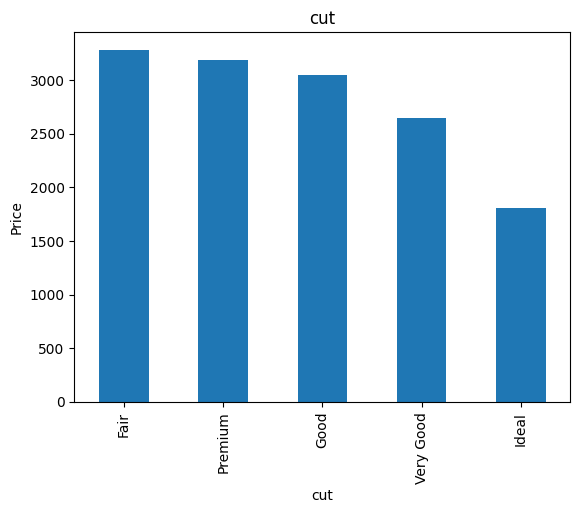

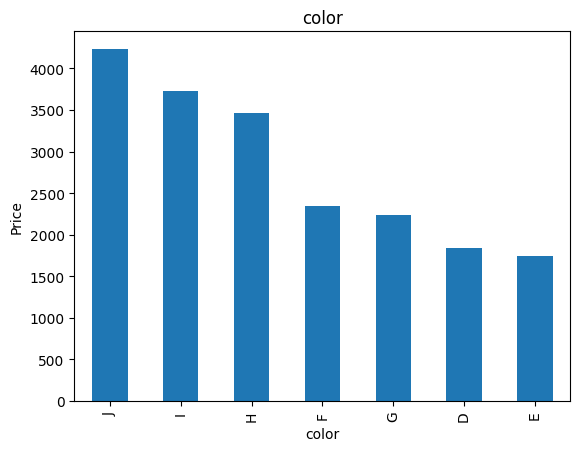

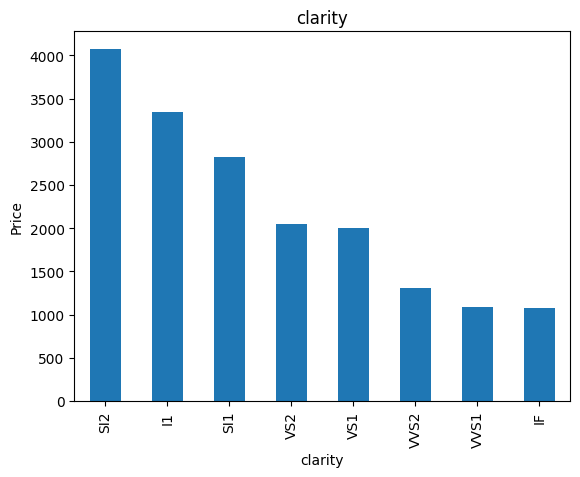

In [83]:
for feature in categorical_features:
  data=df.copy()
  data.groupby(feature)['price'].median().sort_values(ascending=False).plot.bar()
  plt.xlabel(feature)
  plt.ylabel("Price")
  plt.title(feature)
  plt.show()

We can see the clearly which feature affects the price of the diamond.
This will help in our model when we are doing the encoding for this features

Lets also see the count of values of CUT,COlor,clarity

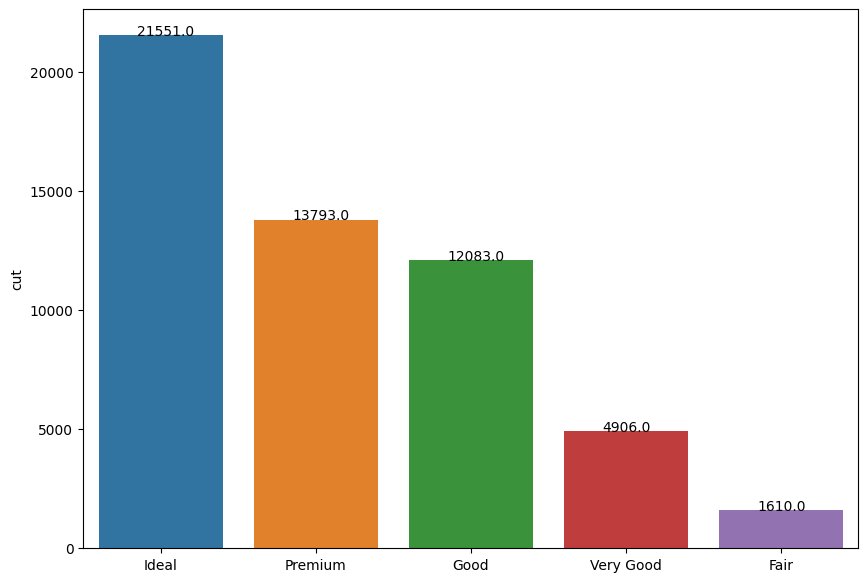

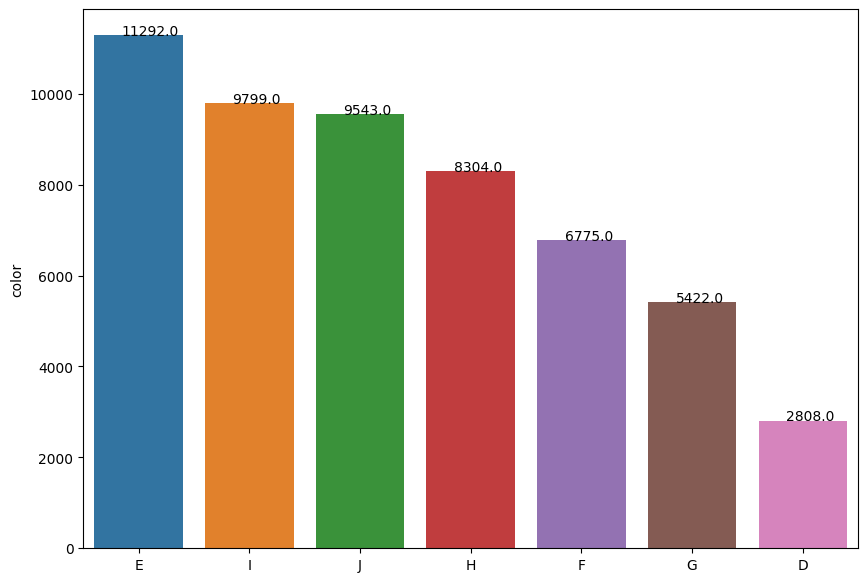

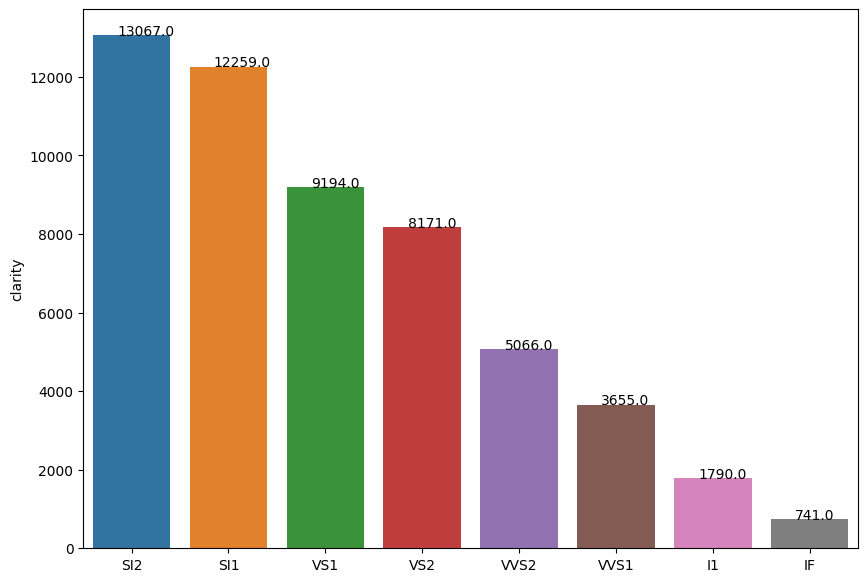

In [84]:
for feature in categorical_features:
  plt.figure(figsize=(10,7))
  ax=sns.barplot(x=df[feature].unique(),y=df[feature].value_counts(),data=df)

  for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

If we observe **cut** plots between the count plot and the price bar plots 
we can observe that

1) As the price of fair cut diamond is high the amount of sale is very low as the count is low and vice versa for ideal cut diamond.

If we similarly observe **clarity** plots between the count plot and price bar plots 

1) both the plots are in sync , that means diamonds with higher clarity are sold the most and so is the price being high as they are providing the higher clarity 


But the best way to visualise the distribution of all categorical variable is by using pie chart

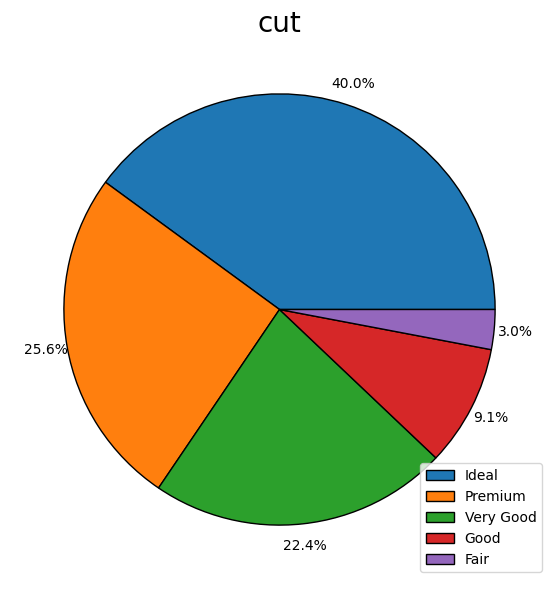

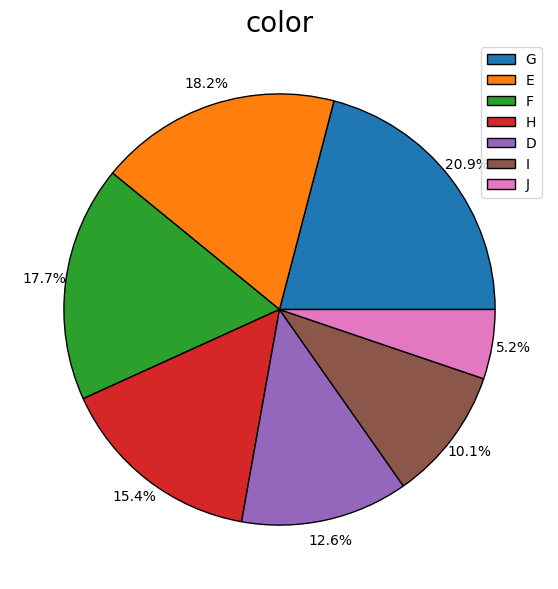

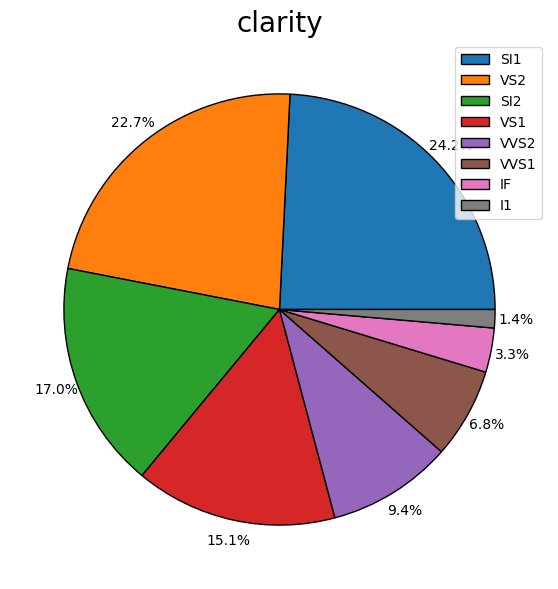

In [85]:
for feature in categorical_features:
  plt.figure(figsize=(7,7))
  plt.pie(x=df[feature].value_counts(),autopct='%1.1f%%',pctdistance=1.1,
          wedgeprops={'linewidth':1.0,'edgecolor':'black'},
          textprops={'color':'black','fontsize':10},
          )
  plt.legend(labels=df[feature].value_counts().index)
  plt.title(feature,fontsize=20)

In [86]:
##lets look into numerical continous variables
numerical_continuous_feature=[feature for feature in df.columns if  df[feature].dtype=='float']
df[numerical_continuous_feature].head()

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75


We will begin by checking the distribution of the continous variable

<Figure size 700x700 with 0 Axes>

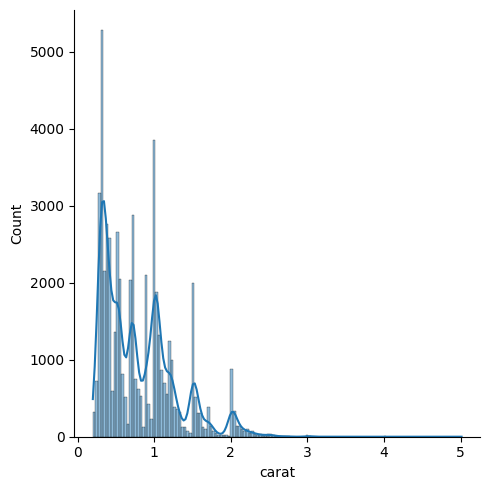

<Figure size 700x700 with 0 Axes>

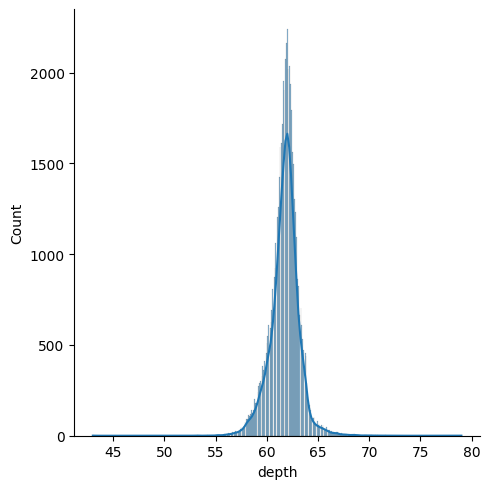

<Figure size 700x700 with 0 Axes>

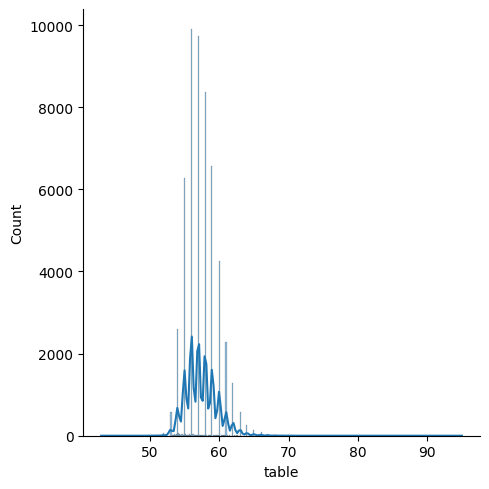

<Figure size 700x700 with 0 Axes>

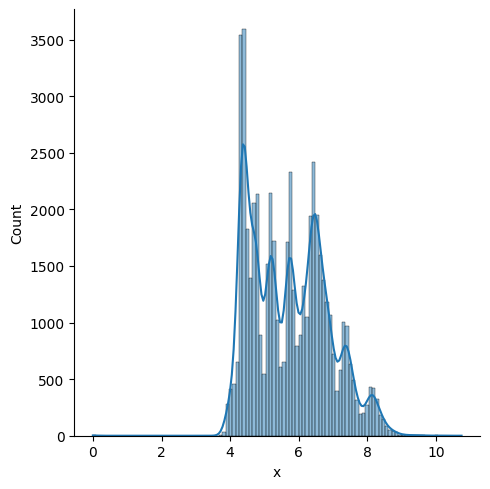

<Figure size 700x700 with 0 Axes>

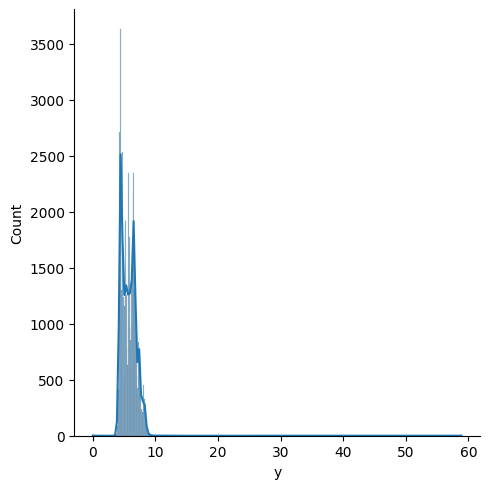

<Figure size 700x700 with 0 Axes>

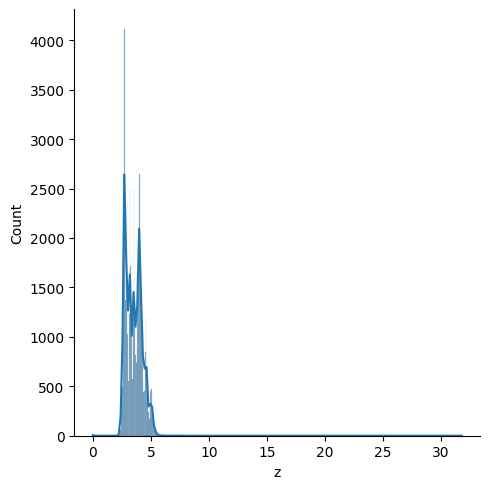

In [87]:
for feature in numerical_continuous_feature:
  plt.figure(figsize=(7,7))
  sns.displot(df[feature],kde=True)


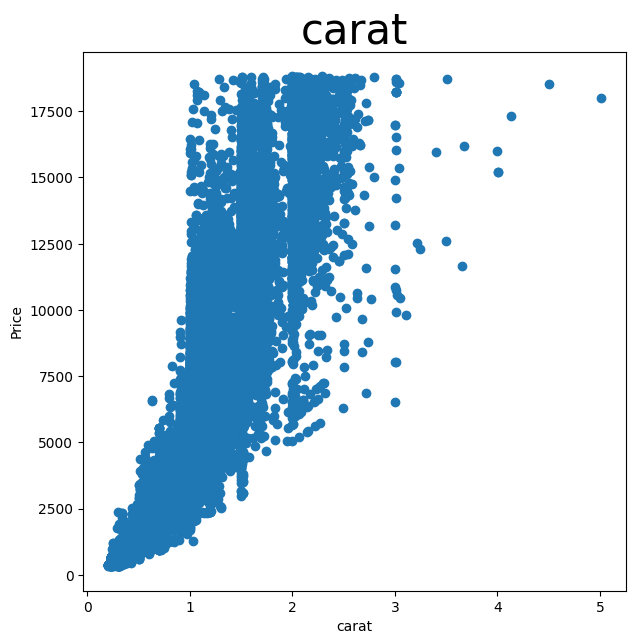

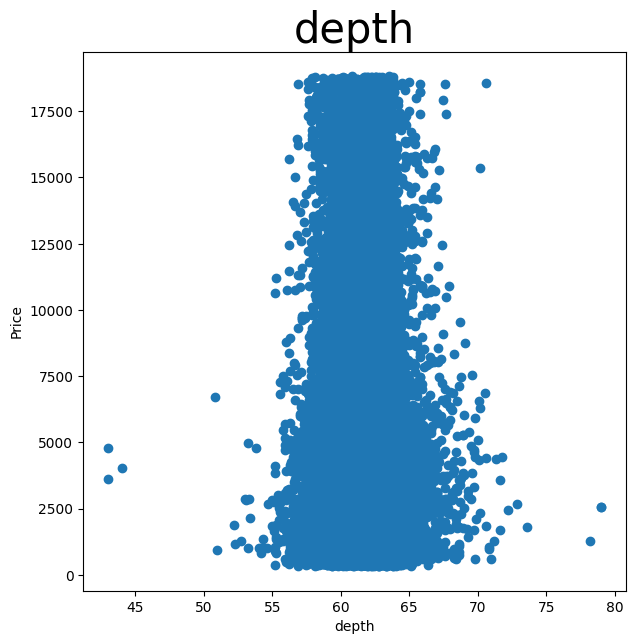

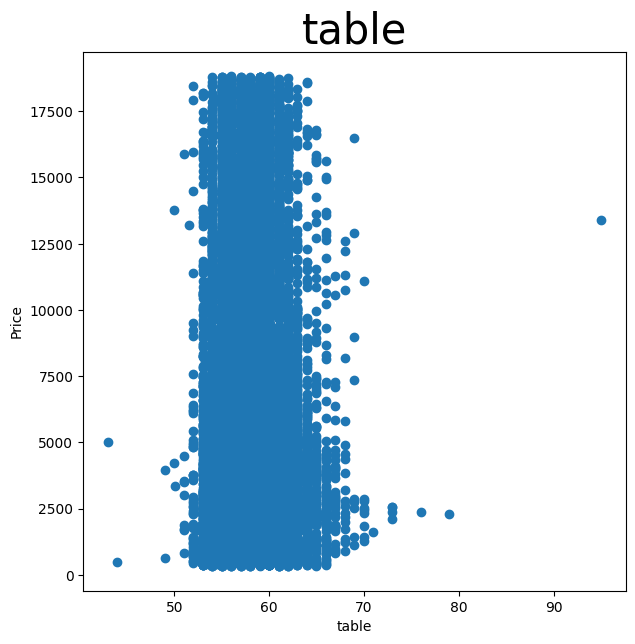

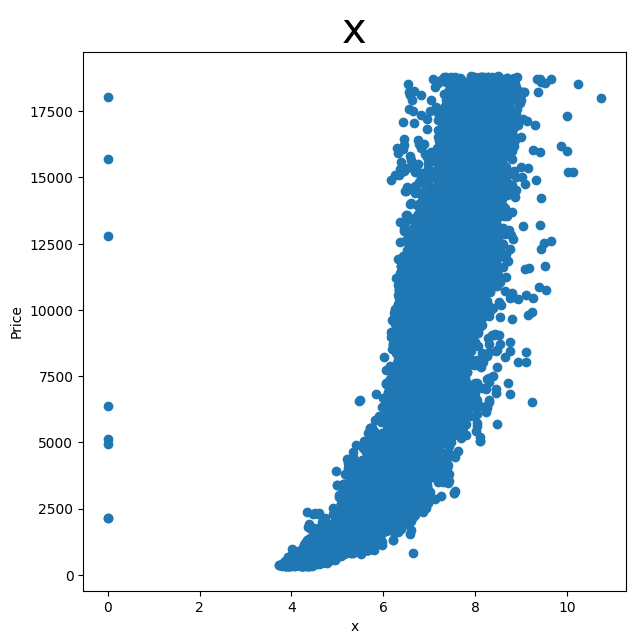

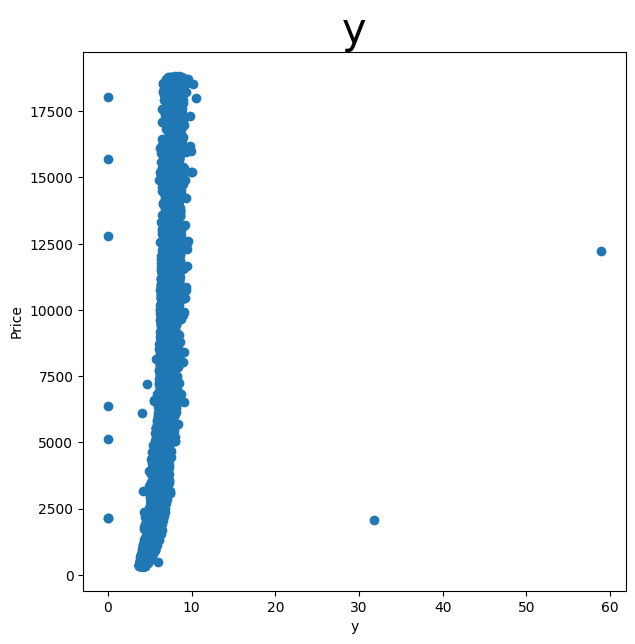

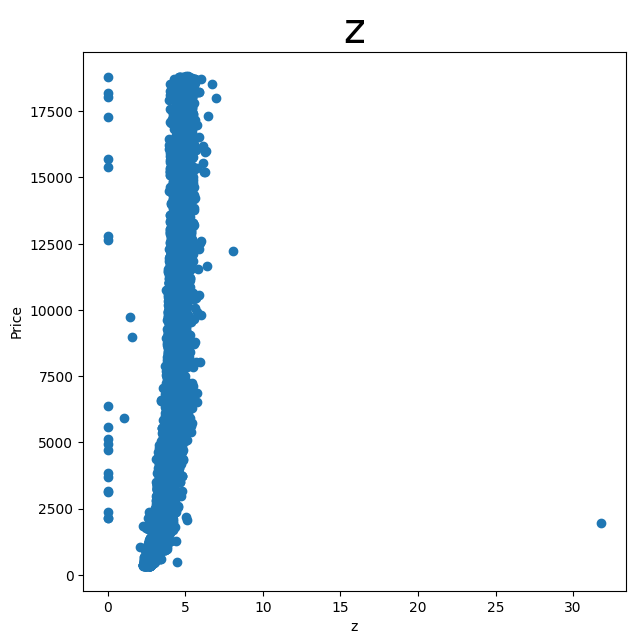

In [88]:
for feature in numerical_continuous_feature:
  plt.figure(figsize=(7,7))
  plt.scatter(x=feature,y='price',data=df)
  plt.xlabel(feature)
  plt.ylabel("Price")
  plt.title(feature,fontsize=30)


##Feature selection - lets begin by checking the co relation matrix wrt to price of numerical data

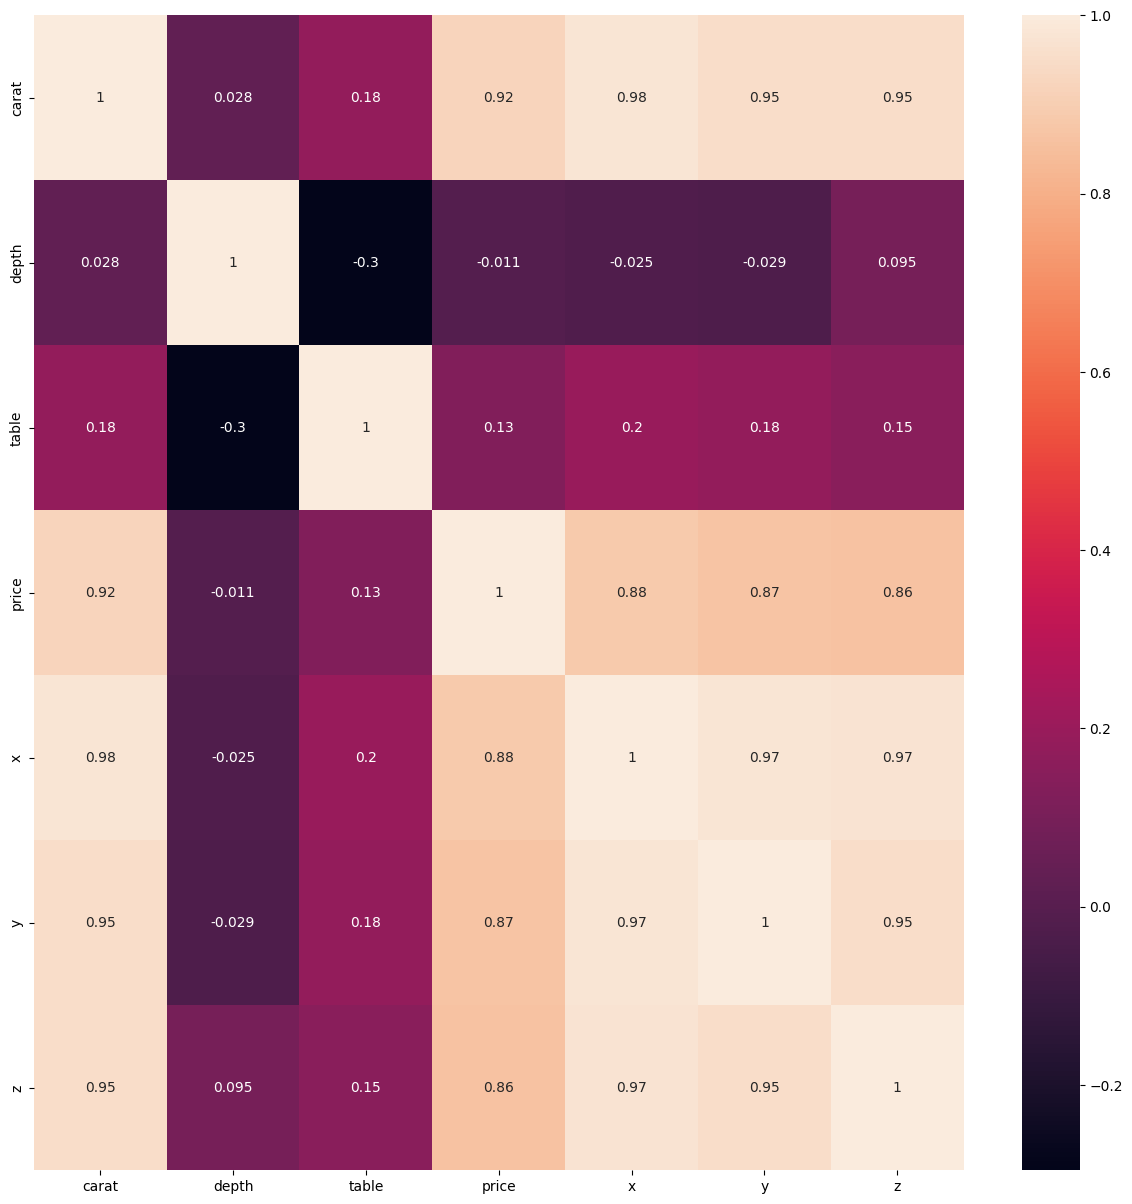

In [89]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

Strong co relation is seen wrt to x,y,z,carat but negligible co relation is observed table and depth but we will still keep this feature 

We can also keep any one feature between x,y,z as they have strong co relation among themselves , but we are still going to use all three as we dont have multiple features to deal with

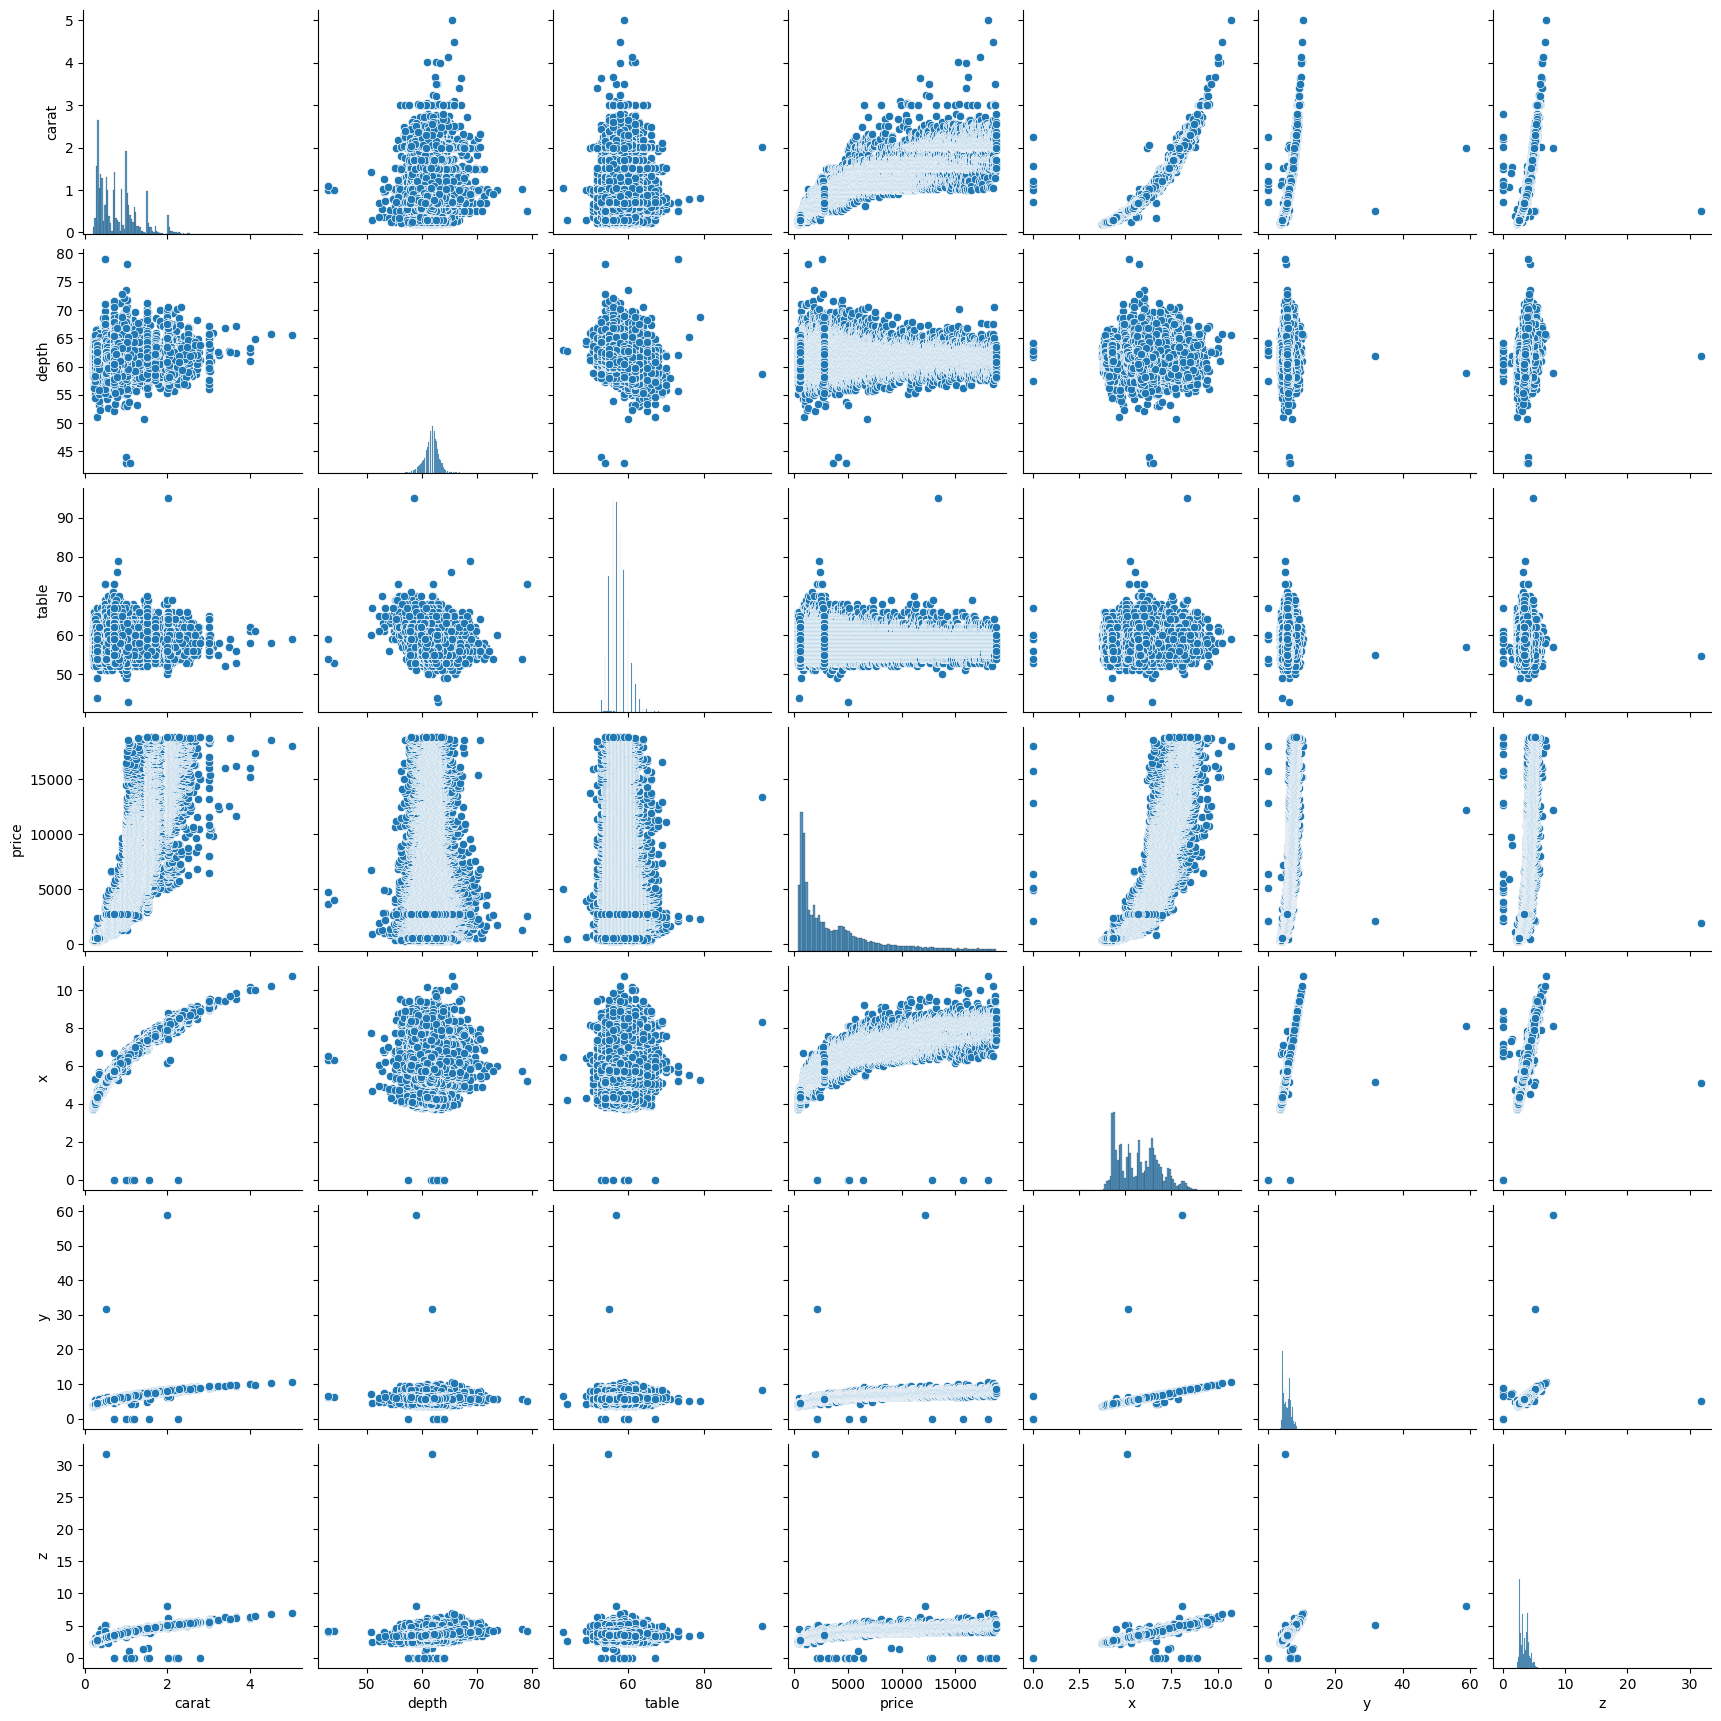

In [90]:
sns.pairplot(data=df)

#Feature engineering

1) outliers

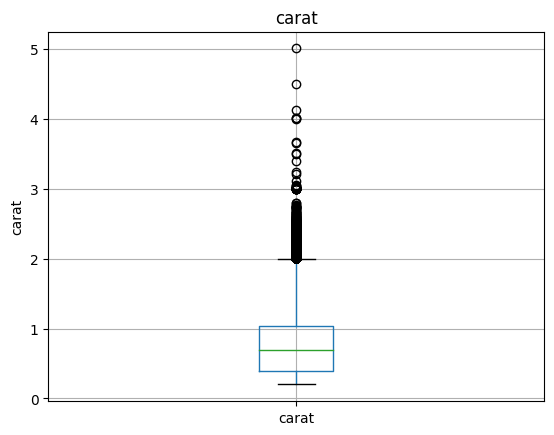

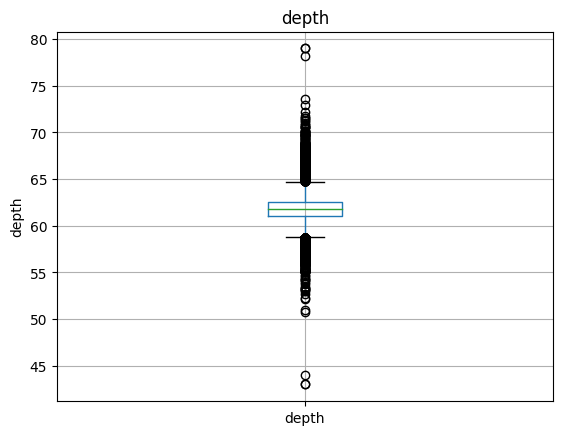

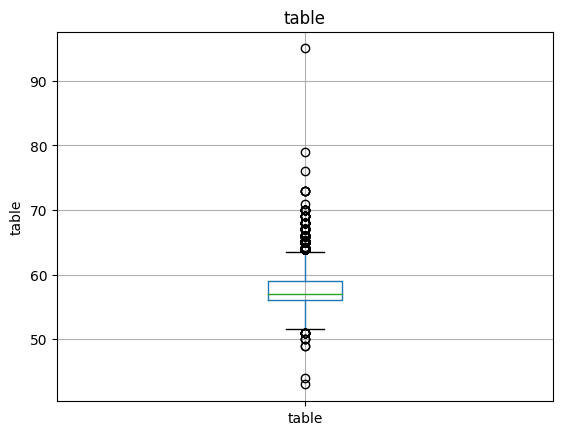

In [91]:
for feature in numerical_continuous_feature:
  data=df.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

Lets remove this outliers using IQR

In [92]:
df.shape

(53943, 10)

In [93]:
for feature in numerical_continuous_feature:
  q1=df[feature].quantile(0.25)
  q3=df[feature].quantile(0.75)

  iqr=q3-q1

  min=q1-1.5*iqr
  max=q3+1.5*iqr

  ##filter the df data 
  df=df[(df[feature]>=min) & (df[feature]<=max)]

In [94]:
df.shape

(48901, 10)

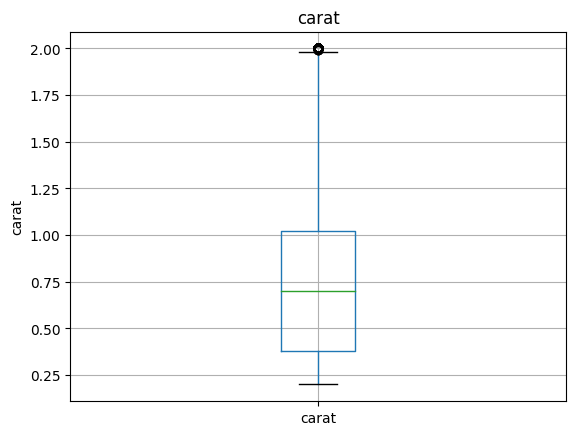

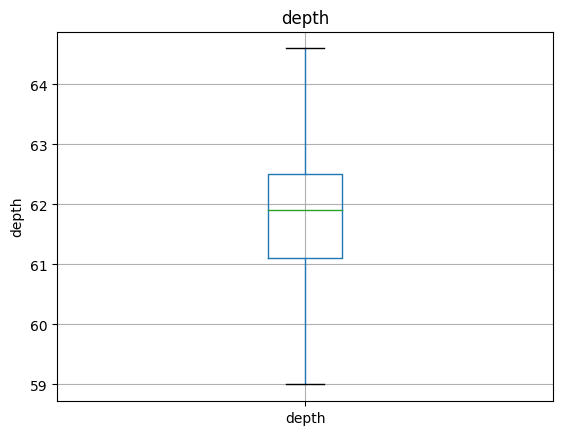

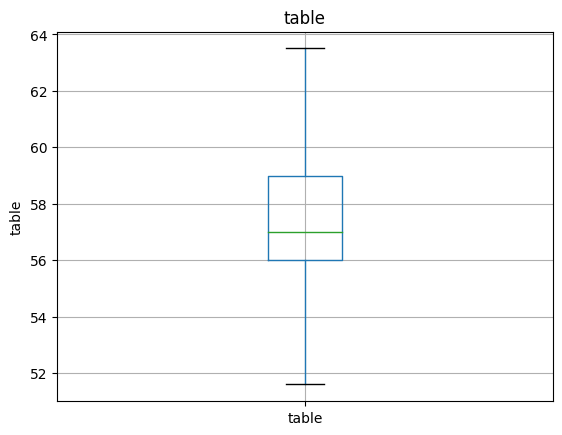

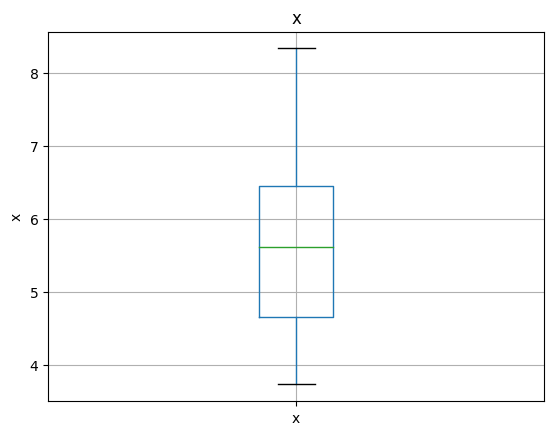

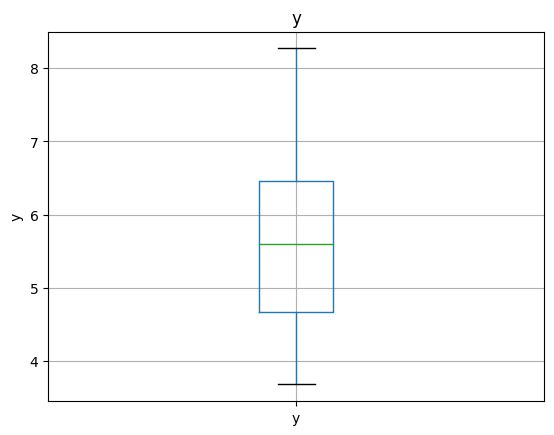

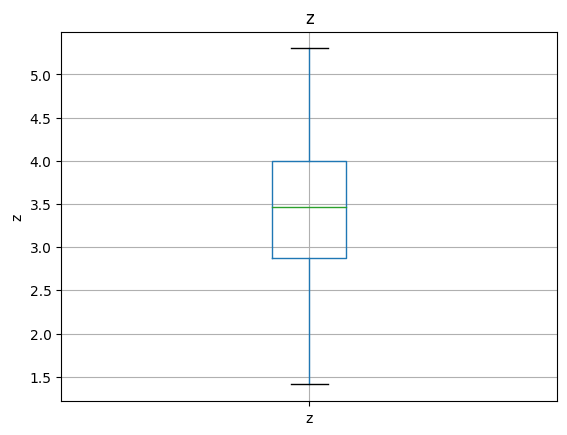

In [95]:
for feature in numerical_continuous_feature:
  data=df.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

##Now the data is clean , lets start encoding for categorical data

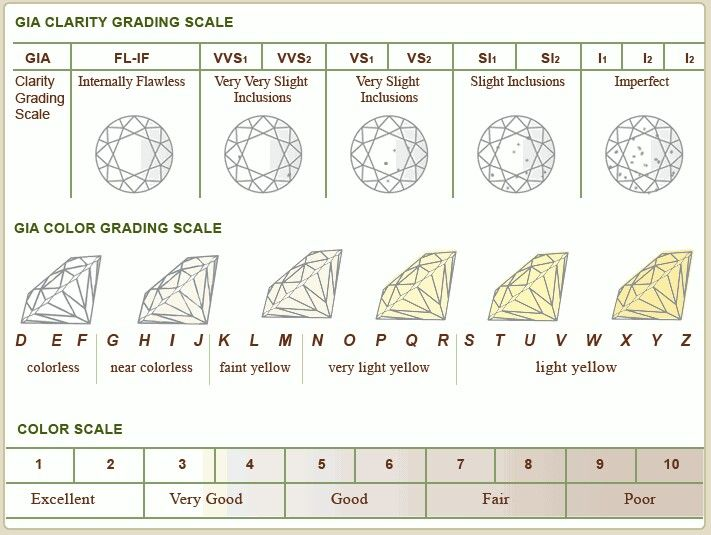


We will use this chart to rank the ordinal data and rank them

In [96]:
df['cut'].unique()
# we will rank from poor to best i.e fair < good < v.good < premium < ideal 

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [97]:
cut_map={'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}

In [98]:
df['cut']=df['cut'].map(cut_map)

In [99]:
df['color'].unique()
#the ranking can be done aplabitacally

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [100]:
color_map={'D':7,'E':6,'F':5,'G':4,'H':3,'I':2,'J':1}

In [101]:
df['color']=df['color'].map(color_map)

In [102]:
df['clarity'].unique()
#we will consider VVS as WS according to the above image
#the rankin will be done again from bad to good 

array(['SI2', 'SI1', 'VS2', 'VVS2', 'VVS1', 'VS1', 'I1', 'IF'],
      dtype=object)

In [103]:
clarity_map={'I1':1,'SI2':2, 'SI1':3,'VS2':4,'VS1':5,'VVS2':6, 'VVS1':7,'IF':8}

In [104]:
df['clarity']=df['clarity'].map(clarity_map)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48901 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    48901 non-null  float64
 1   cut      48901 non-null  int64  
 2   color    48901 non-null  int64  
 3   clarity  48901 non-null  int64  
 4   depth    48901 non-null  float64
 5   table    48901 non-null  float64
 6   price    48901 non-null  int64  
 7   x        48901 non-null  float64
 8   y        48901 non-null  float64
 9   z        48901 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.1 MB


In [106]:
df.head(20)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,3,1,6,62.8,57.0,336,3.94,3.96,2.48
6,0.24,3,2,7,62.3,57.0,336,3.95,3.98,2.47
7,0.26,3,3,3,61.9,55.0,337,4.07,4.11,2.53
9,0.23,3,3,5,59.4,61.0,338,4.00,4.05,2.39
10,0.30,2,1,3,64.0,55.0,339,4.25,4.28,2.73
11,0.23,5,1,5,62.8,56.0,340,3.93,3.90,2.46


In [107]:
X=df.drop(['price'],axis=1)
y=df['price']

In [108]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [109]:
print(X_train.shape)
print(X_test.shape)

(34230, 9)
(14671, 9)


##selects do MINMAX scaling

In [110]:
from sklearn.preprocessing import MinMaxScaler

In [111]:
minmax=MinMaxScaler()

In [112]:
scaled_X_train= minmax.fit_transform(X_train)

In [113]:
scaled_X_test=minmax.transform(X_test)


#Time to apply the alogrithm

In [114]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()

In [115]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [116]:
y_pred=lin_reg.predict(X_test)

In [117]:
from sklearn.metrics import r2_score

In [118]:
r2_score(y_test,y_pred)

0.901080753510529

In [119]:
import pickle

In [120]:
pickle.dump(minmax,open("scaling.pkl","wb"))

In [121]:
pickle.dump(lin_reg,open("reg.pkl","wb"))

In [122]:
test_data=[0.21	,4,	6,	3,	59.8,	61.0,	3.26,	3.89,	3.84]

In [127]:
test_data=np.array(test_data).reshape(1,-1)

In [141]:
scalar=pickle.load(open("scaling.pkl","rb"))
reg=pickle.load(open("reg.pkl","rb"))

In [135]:
test_data=scalar.transform(test_data)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [136]:
test_data

array([[ 0.00555556,  0.75      ,  0.83333333,  0.28571429,  0.14285714,
         0.78991597, -0.10307018,  0.04575163,  0.65853659]])

In [142]:
y=reg.predict(test_data)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [143]:
y[0]

2052.5348845838776